In [2]:
import CHSHCHSH
import numpy as np

# The CHSH Correlator for a Bell State
## Will Parker
The aim of this assignment was to show the violation of the classical limit of the CHSH correlator by generating probabilistically accurate data for the measurement of a two-qubit Bell State. That is, starting with the Bell State:
$$\left|\Phi\right> = \frac{1}{2} ( \left|00\right> + \left|11\right>)$$
and one observable for each qubit, I calculated the probability of each outcome. Each observable had eigenstates:
$$\left|\theta\right> = \cos{\frac{\theta}{2}}\left|0\right> + \sin{\frac{\theta}{2}}\left|1\right>$$
$$\left|\theta^\perp\right> = -\sin{\frac{\theta}{2}}\left|0\right> + \cos{\frac{\theta}{2}}\left|1\right>$$
with eigenvalues $\lambda = +1,-1$ respectively.
To calculate the probability of a measurement of $(\lambda_1,\lambda_2)$ I created the projector for the respective eigenstate and found its expectation value. So I ended up with:
$$P(+1,+1) = \left<\Phi|\theta_1\theta_2\right>\left<\theta_1\theta_2|\Phi\right>$$
$$P(+1,-1) = \left<\Phi|\theta_1\theta_2^\perp\right>\left<\theta_1\theta_2^\perp|\Phi\right>$$
$$P(-1,+1) = \left<\Phi|\theta_1^\perp\theta_2\right>\left<\theta_1^\perp\theta_2|\Phi\right>$$
$$P(-1,-1) = \left<\Phi|\theta_1^\perp\theta_2^\perp\right>\left<\theta_1^\perp\theta_2^\perp|\Phi\right>$$
which gives:
$$P(+1,+1) = \frac{1}{2}\cos^2\left(\frac{\theta_1-\theta_2}{2}\right)$$
$$P(-1,-1) = \frac{1}{2}\cos^2\left(\frac{\theta_1-\theta_2}{2}\right)$$
$$P(+1,-1) = \frac{1}{2}\sin^2\left(\frac{\theta_1-\theta_2}{2}\right)$$
$$P(-1,+1) = \frac{1}{2}\sin^2\left(\frac{\theta_1-\theta_2}{2}\right)$$

I generated large sets of outcomes for the measurements matching these probabilities. Each outcome was in the form of a tuple of data $(\pm 1, \pm 1)$.

In order to average the data, I multiplied each tuple, and then averaged over that set of values; so if the measurements were the same - $(1,1)$ or $(-1,-1)$ - then multiplying would give $+1$. If they were different, multiplying would give $-1$. So for example, for $\theta_1 = \theta_2 = 0$ it's clear that the probability of both observables measuring the same eigenvalue should be unity; thus, their average should be 1. 

In [2]:
theta1 = 0; theta2 = 0
l = CHSH.makeData(1000,theta1, theta2)
CHSH.avgDataTog(l)

0.999

We see that indeed, for 1000 measurements, almost all of them returned either (1,1) or (-1,-1). 

Likewise, for $\theta_1 = \pi, \theta_2 = 0$, all measurements will return (+1,-1) or (-1,+1), and for $\theta_1 = \frac{\pi}{2}, \theta_2 = 0$, measurements will return (+1,-1), (-1,+1), (-1,-1), (+1,+1) with equal probabilities, so their average will be 0.

In [3]:
theta1 = np.pi; theta2 = 0
l = CHSH.makeData(1000,theta1, theta2)
CHSH.avgDataTog(l)

-0.999

In [4]:
theta1 = np.pi/2; theta2 = 0
l = CHSH.makeData(1000,theta1, theta2)
CHSH.avgDataTog(l)

-0.044999999999999998

Also, it's good to note that, when averaged separately, each observable seems to be completely random; that is, the average measured value for each observable is 0. 

In [5]:
theta1 = np.pi; theta2 = 0
l = CHSH.makeData(1000,theta1, theta2)
CHSH.avgDataSep(l)

array([ 0.,  0.])

In [6]:
theta1 = np.pi/2; theta2 = 0
l = CHSH.makeData(1000,theta1, theta2)
CHSH.avgDataSep(l)

array([ 0.,  0.])

This verifies validity of the function for a couple simple tests. Before we move on to the CHSH correlator, I should mention the expectation value of the observable pair $O_1(\theta_1)O_2(\theta_2)$. This can be calculated by:

$$\left<\Phi| \hat{O}_1 \otimes \hat{O}_2 |\Phi\right>$$

Where $\hat{O} = \lambda_1 \left|\theta_1\right>\left<\theta_1\right| + \lambda_2 \left|\theta_1^\perp \right>\left<\theta_1^\perp\right| = \left|\theta_1\right>\left<\theta_1\right| - \left|\theta_1^\perp \right>\left<\theta_1^\perp \right|$ is the operator corresponding to the first observable, and likewise for $\hat{O}_2$.

When worked out, this comes to:

$$\left<\Phi| \hat{O}_1 \otimes \hat{O}_2 |\Phi\right> = \cos^2\left(\frac{\theta_1-\theta_2}{2}\right) - \sin^2\left(\frac{\theta_1-\theta_2}{2}\right) = \cos(\theta_1 - \theta_2)$$

What this physically gives is the average measured value for the pair of observables as a function of $\theta_1$ and $\theta_2$.

Now for the CHSH correlator. Writing $\hat{O}(\theta_1,\theta_2) = \hat{O}_1(\theta_1) \otimes \hat{O}_2(\theta_2)$, we can define the CHSH correlator as:

$$ CHSH = \hat{O}\left(0,\frac{\pi}{4}\right) + \hat{O}\left(0,-\frac{\pi}{4}\right) + \hat{O}\left(\frac{\pi}{2},\frac{\pi}{4}\right) - \hat{O}\left(\frac{\pi}{2},-\frac{\pi}{4}\right)$$

Classically - that is, where both observables are perfectly correlated such that the measurement always yields either (1,1) or (-1,-1), but with equal probability - this correlator, for the Bell state in this problem, is actually independent of $\theta_1$ and $\theta_2$. This is equivalent to calculating the expectation value of each qubit individually and multiplying them. Thus, the correlator should always give a value of 2. 

Indeed, even in general, this correlator should never exceed 2, for classical probabilities. However, in this case, it reaches a value of $2 \sqrt{2}$. We can see this by generating a large set of data and simply computing it. 

In [7]:
print(2*np.sqrt(2))
CHSH.CHSH(50000)

2.82842712475


2.8281199999999997

We see that for 50000 measurement tuples generated using the probabilities listed above, the CHSH correlator comes to a value higher than the classical limit. Now, to see how this correlator works for varying angles, we keep the $\theta_1$s constant, and add $\phi$ to $\theta_2$ where $\phi$ varies from 0 to $2\pi$. 

Plugging in above, this gives us:

$$CHSH = \cos(-\frac{\pi}{4}-\phi) + \cos(\frac{\pi}{4}-\phi) + \cos(\frac{\pi}{4}-\phi) - \cos(\frac{3\pi}{4}-\phi)$$

Just for some reference, let's look at this function plotted numerically from $\phi = 0$ to $\phi = 2\pi$:

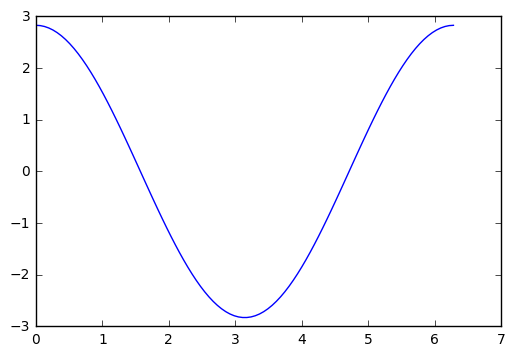

In [ ]:
CHSH.plotCHSHCalcd(50000)

And now, finally, we can run the simulated two-qubit measurement of the Bell state, using the CHSH correlator prescription, and compare its value as a function of $\phi$ to the analytic plot of the correlator as a function of $\phi$. To summarize, this program is generating measurement tuples based on analytic expressions for the probabilities of each possible outcome from the set ${(+1,+1),(-1,-1),(+1,-1),(-1,+1)}$. Then, to average the values, each tuple is multiplied, giving either 1 or -1. It is clear, then, that if these probabilities are given classically - with the pair perfectly correlated, but an equal probability of (+1,+1) and (-1,-1) - then the CHSH correlator would have a maximum value of 2. However, we see from the graph above that analytically, its maximum is in fact $2\sqrt{2}$. Finally, here is the same plot for the generated values:

In [ ]:
CHSH.plotCHSHData(50000)

All is as it should be. The data generated based on the observable pair seems to be correlated in a way that defies classical correlation, and matches perfectly the analytically derived expectation value. 